In [1]:
s = poly(0, 's')

 s  = 
  s


In [2]:
w1 = (1 + 1 / (2.3*s)) * 0.77 * (1/(1 + 0.75 * s)^3)
w = w1 / (1 + w1)

 w1  = 
                 0.77 +1.771s                
   ----------------------------------------  
   2.3s +5.175s^2 +3.88125s^3 +0.9703125s^4  
 w  = 
               0.7935588 +1.8251852s               
   ----------------------------------------------  
   0.7935588 +4.1955556s +5.3333333s^2 +4s^3 +s^4  


In [3]:
sys = syslin('c', w)

 sys  = 
               0.7935588 +1.8251852s               
   ----------------------------------------------  
   0.7935588 +4.1955556s +5.3333333s^2 +4s^3 +s^4  


In [4]:
h = 0.1;
sysd = dscr(sys, h);
sysd.A
sysd.B
sysd.C

 ans  =
   1.0242718   0.0793973   0.0067179   0.000052 
  -0.0257151   0.9908136   0.1590246   0.0019064
  -0.171475   -0.2391469   0.6527589   0.0182308
   0.0329667  -0.0445559   0.057745    0.956865 
 ans  =
  -0.0003725
  -0.0137053
  -0.1321518
   0.0042935
 ans  =
  -0.7473266   0.   6.939D-18   0.


In [15]:
ac = [0.7945588; 4.1955556; 5.3333333; 4];
A = [zeros(1, 3); eye(3, 3)];
A = [A -ac]
B = [0.7935588; 1.8251852; 0; 0]
C = [0 0 0 1]

 A  = 
   0.   0.   0.  -0.7945588
   1.   0.   0.  -4.1955556
   0.   1.   0.  -5.3333333
   0.   0.   1.  -4.       
 B  = 
   0.7935588
   1.8251852
   0.
   0.
 C  = 
   0.   0.   0.   1.


In [12]:
Ad = (A * h + eye(A))

 Ad  = 
   1.    0.    0.   -0.0794559
   0.1   1.    0.   -0.4195556
   0.    0.1   1.   -0.5333333
   0.    0.    0.1   0.6      


In [15]:
Ad = expm(A*h)

 Ad  = 
   0.9999969  -0.0001199  -0.0034768  -0.0648967
   0.0999839   0.9993701  -0.0183032  -0.3428833
   0.0049792   0.0991794   0.976033   -0.4539083
   0.0001509   0.0043757   0.0816765   0.6493271


In [16]:
hd = [];
adk = eye(Ad);
// for k=1:50 hd = [hd; C*Ad^(k - 1)*B]
for k=1:50 
    hd = [hd; C*adk*B];
    adk = adk * Ad;
end;
hd

 hd  = 
   0.
   0.
   0.0182519
   0.0482484
   0.0851118
   0.1252126
   0.1658794
   0.2051783
   0.2417437
   0.2746487
   0.3033049
   0.3273846
   0.3467607
   0.3614590
   0.3716204
   0.3774721
   0.3793027
   0.3774441
   0.3722559
   0.3641127
   0.3533946
   0.3404792
   0.3257347
   0.3095155
   0.2921577
   0.2739765
   0.2552640
   0.2362875
   0.2172887
   0.1984837
   0.1800624
   0.1621895
   0.1450050
   0.1286251
   0.1131436
   0.0986328
   0.0851457
   0.0727169
   0.0613645
   0.0510916
   0.0418881
   0.0337321
   0.0265919
   0.0204269
   0.0151896
   0.0108267
   0.0072806
   0.0044903
   0.0023928
   0.0009241


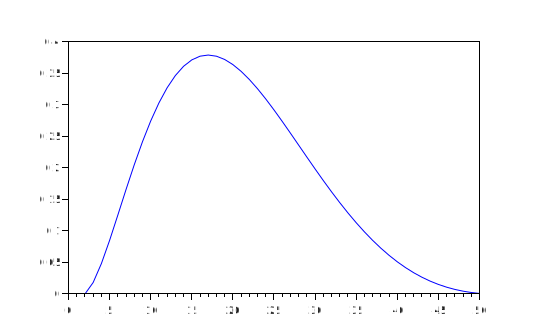

In [21]:
plot(hd)

In [19]:
hh = [
    -7.090E-11
    7.324E-01
    1.531E+00
    5.390E-01
    1.148E+00
    1.137E+00
    7.537E-01
    1.180E+00
    9.635E-01
    9.217E-01
    1.109E+00
    9.323E-01
    1.002E+00
    1.043E+00
    9.525E-01
    1.023E+00
    1.006E+00
    9.787E-01
    1.020E+00
    9.924E-01
    9.948E-01
    1.010E+00
    9.922E-01
    1.002E+00
    1.003E+00
]


 hh  = 
  -7.090D-11
   0.7324
   1.531
   0.539
   1.148
   1.137
   0.7537
   1.18
   0.9635
   0.9217
   1.109
   0.9323
   1.002
   1.043
   0.9525
   1.023
   1.006
   0.9787
   1.02
   0.9924
   0.9948
   1.01
   0.9922
   1.002
   1.003


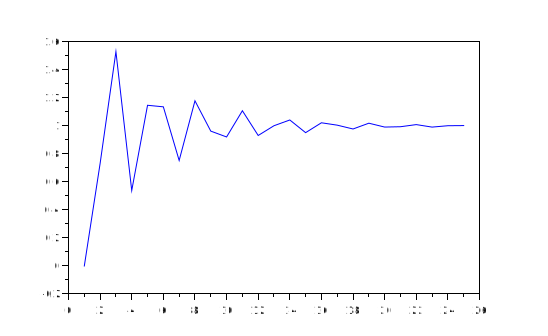

In [22]:
plot(hh)